### Imports

In [1]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [2]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle

### Data

In [3]:
experiment_name = 'PMG 247 monitoring'

In [4]:
mixture_path = '../../data/PMG_247/PMG247_monitoring_pierwsze_54_widma.csv'

reagents_path = '../../data/PMG_247/PMG247_widmo0.csv'

mixture_separator = ','

reagents_separator = '\t'

data_path = '../../data/PMG_247/'

#### Mixture in time

In [5]:
mixture_time_data = pd.read_csv(mixture_path, sep = mixture_separator)

In [6]:
names = ['ppm'] + ['t' + str(nb) for nb in range(1, mixture_time_data.shape[1])]

In [7]:
mixture_time_data.columns = names

In [8]:
mixture_time_data_cut_to_region = mixture_time_data[mixture_time_data['ppm'].apply(lambda x: x>1.8 and x<3)]

In [9]:
def load_spectrum(mixture_time_data, moment_of_time):
    ppm = mixture_time_data['ppm']
    intensity = mixture_time_data['t'+str(moment_of_time)]
    sp = NMRSpectrum(confs = list(zip(ppm, intensity)))
    return sp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


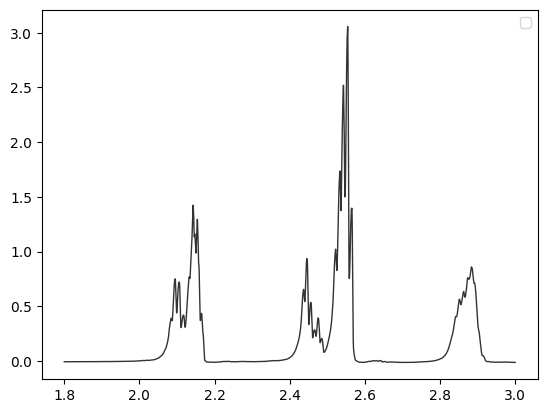

In [10]:
NMRSpectrum.plot_all([load_spectrum(mixture_time_data_cut_to_region, 1)], profile=True)

#### Reagents

In [11]:
reagent = pd.read_csv(reagents_path, sep=reagents_separator, header=None).iloc[:,:2]

In [12]:
reagent_cut_to_region = reagent[reagent[0].apply(lambda x: x>1.8 and x<3)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


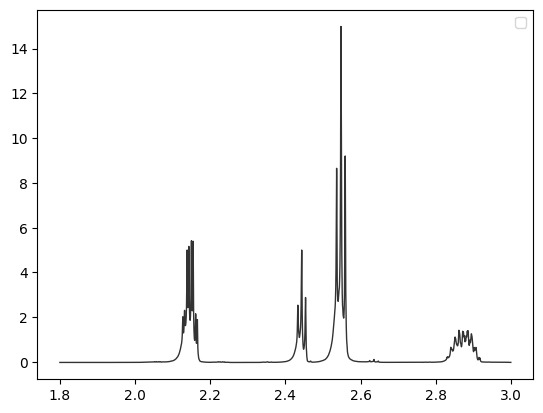

In [13]:
ppm = reagent_cut_to_region.iloc[:,0]
ints = reagent_cut_to_region.iloc[:,1]
reagent_sp = NMRSpectrum(confs = list(zip(ppm, ints)))
NMRSpectrum.plot_all([reagent_sp], profile=True)

In [14]:
substrat0 = reagent_cut_to_region[reagent_cut_to_region[0].apply(lambda x: x<2.475)]
substrat1 = reagent_cut_to_region[reagent_cut_to_region[0].apply(lambda x: x>=2.475)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


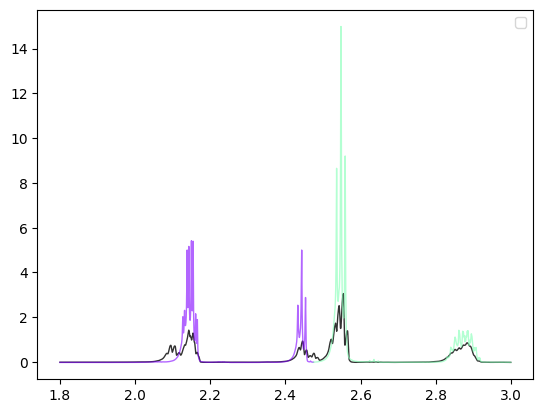

In [15]:
ppm = substrat0.iloc[:,0]
ints = substrat0.iloc[:,1]
sp0_sp = NMRSpectrum(confs = list(zip(ppm, ints)))
ppm = substrat1.iloc[:,0]
ints = substrat1.iloc[:,1]
sp1_sp = NMRSpectrum(confs = list(zip(ppm, ints)))
mix1 = load_spectrum(mixture_time_data_cut_to_region, 1)
NMRSpectrum.plot_all([mix1, sp0_sp, sp1_sp], profile=True)

### Saving preprocessed spectra

In [16]:
np.savetxt(data_path + 'preprocessed_PMG247_monitoring.csv', mixture_time_data_cut_to_region, delimiter = ',')
np.savetxt(data_path + 'preprocessed_substrate0.csv', substrat0, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_substrate1.csv', substrat1, delimiter = '\t')